<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">

<h3 align="left"><font color='#f79a05'>💡 Inspiration:</font></h3>
    
**Purpose**: to object detection in images by using **YOLOv8**.

**Object detection** is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.
When it comes to object detection, popular detection frameworks are

* YOLO
* SSD
* Faster R-CNN


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> What is YOLO exactly?</p>

<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">

<h3 align="left"><font color='black'>What is YOLO exactly?</font></h3>
    
**YOLO** (You Only Look Once) is a method / way to do object detection. It is the algorithm /strategy behind how the code is going to detect objects in the image.

Earlier detection frameworks, looked at different parts of the image multiple times at different scales and repurposed image classification technique to detect objects. This approach is slow and inefficient.

YOLO takes entirely different approach. It looks at the entire image only once and goes through the network once and detects objects. Hence the name. It is very fast. That’s the reason it has got so popular.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [124]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [125]:
df = pd.read_csv('../input/self-driving-cars/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
83011,1479501521678379162.jpg,367,459,141,174,1
88841,1479502234720350336.jpg,130,145,142,153,1
91273,1479502425239194828.jpg,191,199,140,147,1
37755,1478896893517025816.jpg,134,154,156,171,1
18700,1478732200521726268.jpg,143,152,94,109,5


<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">
    
 * This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.
 * classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [126]:
classes = df.class_id.unique()
print(classes)

[1 5 4 2 3]


In [127]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [128]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '../input/self-driving-cars/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

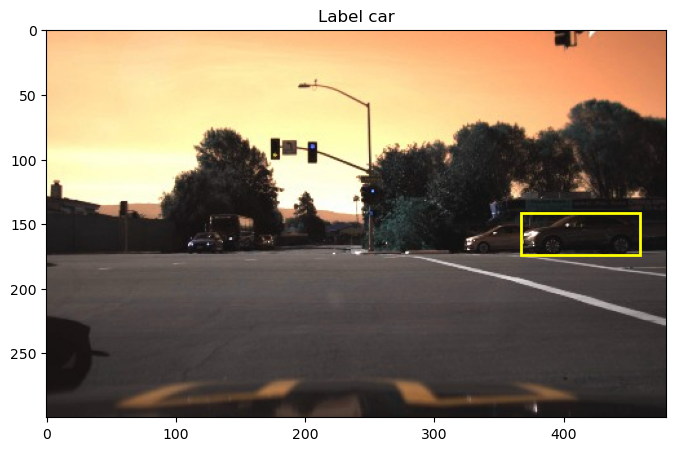

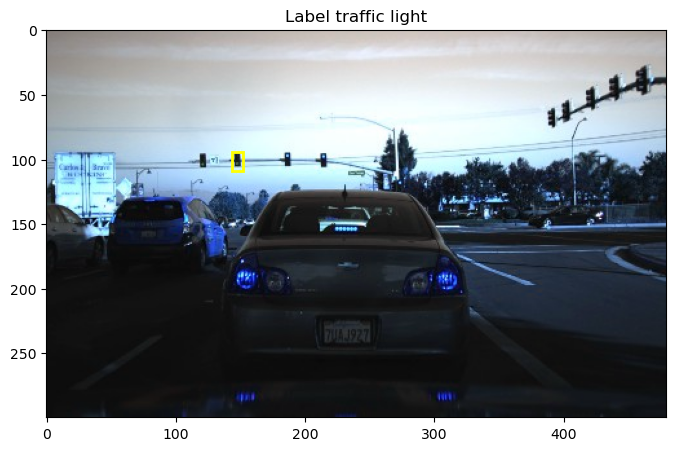

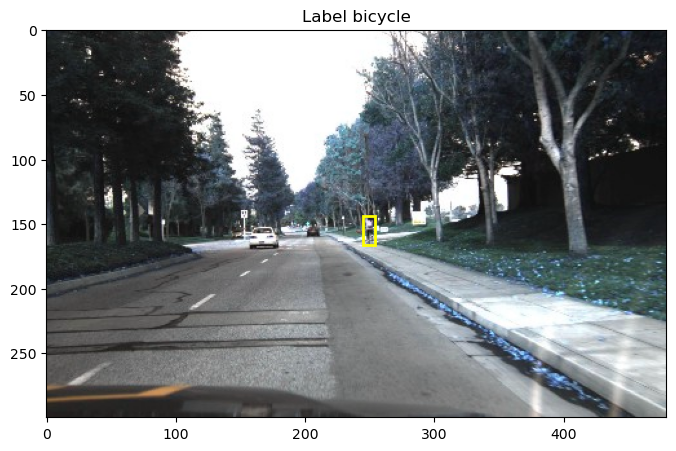

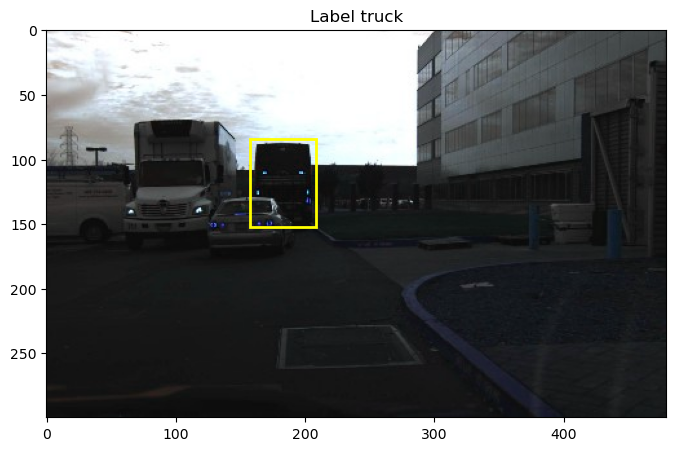

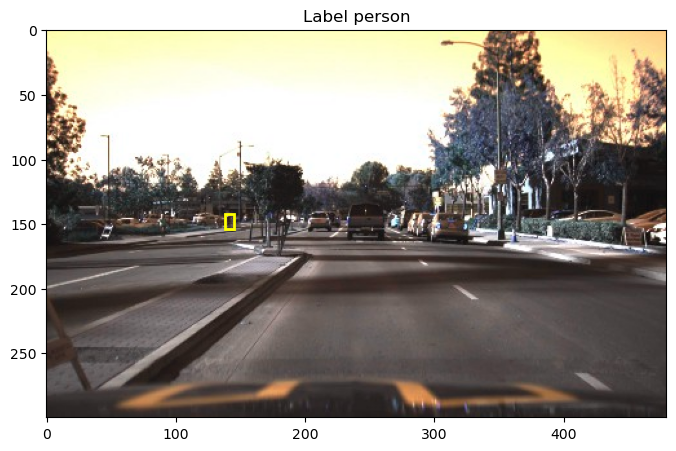

In [129]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [130]:
!pip install ultralytics

In [131]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [132]:
model = YOLO("yolov8m.pt")

In [133]:
results=model.predict(source="/kaggle/input/self-driving-cars/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /kaggle/input/self-driving-cars/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 518.0ms
Speed: 2.3ms preprocess, 518.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict6


In [134]:
result = results[0]
box = result.boxes[0]

In [135]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [136]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161698937416077


In [137]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [138]:
results1 = model.predict(source="/kaggle/input/self-driving-cars/images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /kaggle/input/self-driving-cars/images/1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 508.2ms
Speed: 2.2ms preprocess, 508.2ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict6


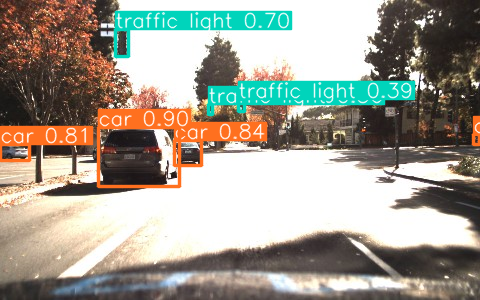

In [139]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))